# Preprocessing

### Importing libraries and datasets

In [54]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import cleaning_functions as cf 

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [25]:
combined_file_path = '../data/cleaned/winequality_combined_cleaned.csv' 
combined_df = pd.read_csv(combined_file_path)
combined_df

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
5315            6.2              0.21         0.29             1.6      0.039   
5316            6.6              0.32         0.36             8.0      0.047   
5317            6.5              0.24         0.19             1.2      0.041   
5318            5.5              0.29         0.30             1.1      0.022   
5319            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
5315                 24.0                  92.0  0.99114  3.27       0.50   
5316                 57.0                 168.0  0.99490  3.15       0.46   
5317                 30.0                 111.0  0.99254  2.99       0.46   
5318                 20.0                 110.0  0.98869  3.34       0.38   
5319                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality wine_type  
0         9.4        5       red  
1         9.8        5       red  
2         9.8        5       red  
3         9.8        6       red  
4         9.4        5       red  
...       ...      ...       ...  
5315     11.2        6     white  
5316      9.6        5     white  
5317      9.4        6     white  
5318     12.8        7     white  
5319     11.8        6     white  

[5320 rows x 13 columns]

### Distributions

<Figure size 1500x1500 with 0 Axes>

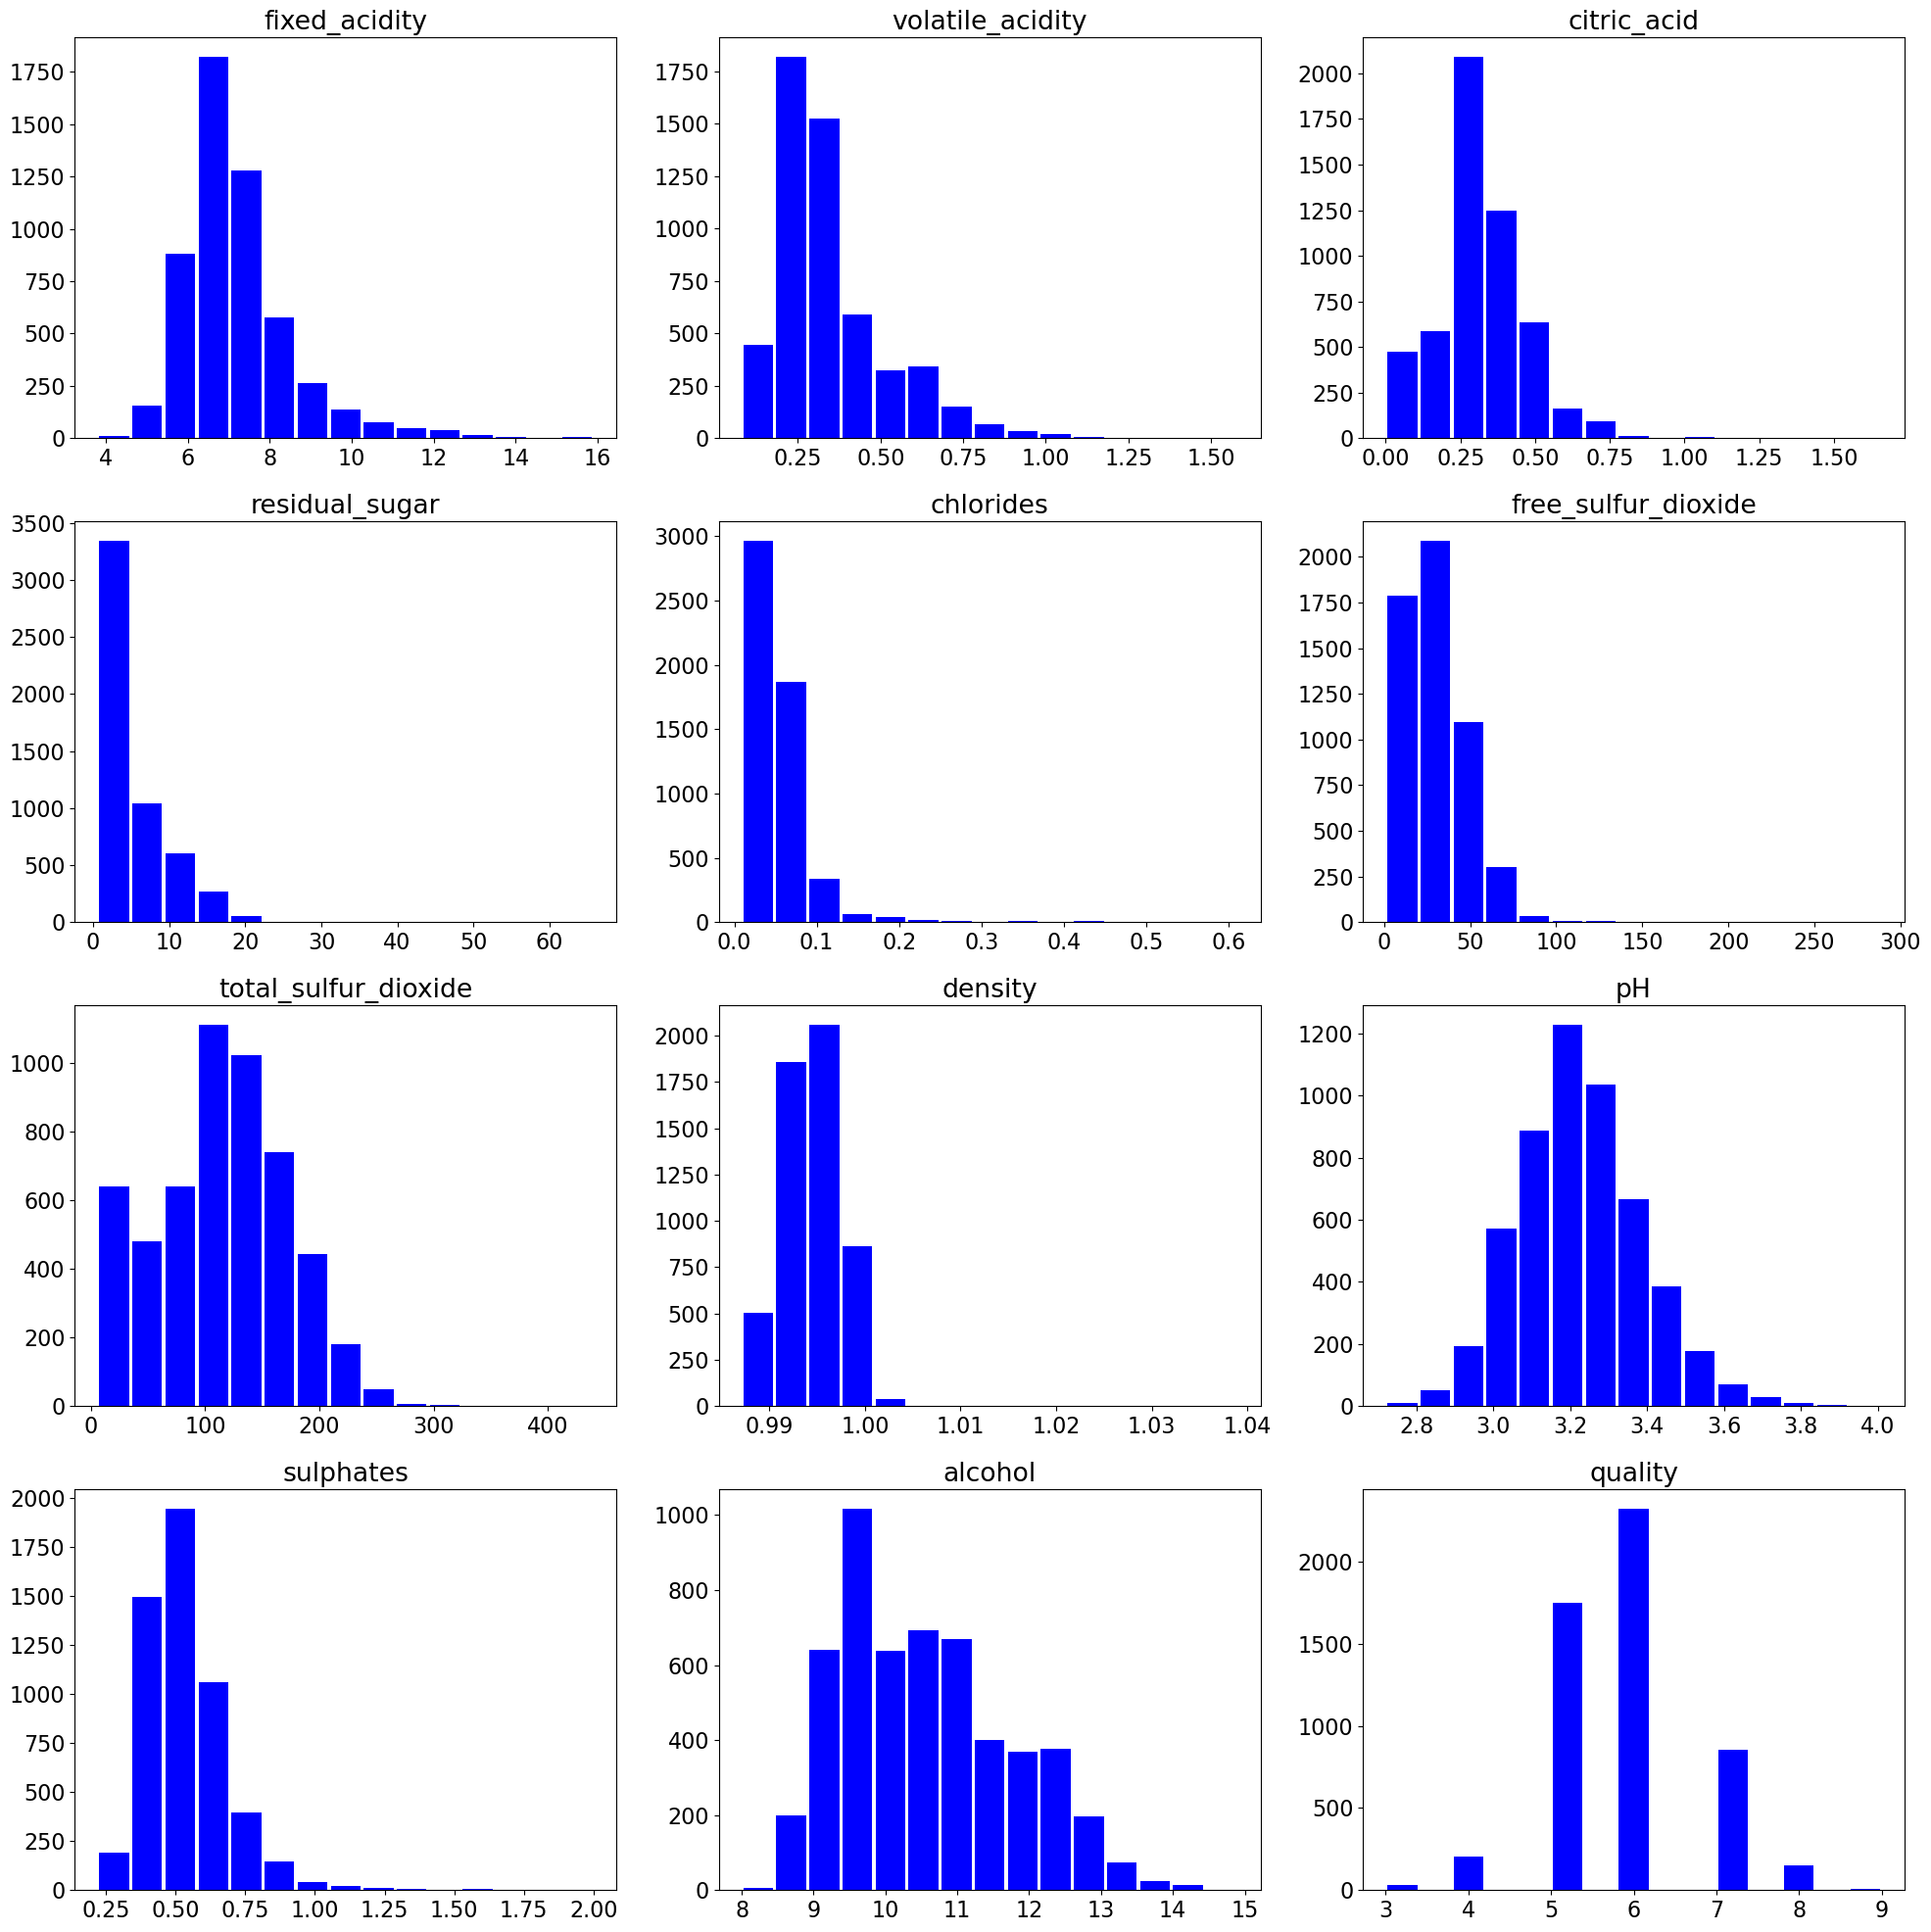

In [26]:
plt.figure(figsize=(15, 15))
combined_df.hist(bins=15, grid=False, figsize=(20, 20), color='blue', zorder=2, rwidth=0.9)
plt.tight_layout()
plt.rcParams.update({'font.size': 16})
plt.show()

### Splitting data into X and y

In [48]:
#define X and Y
X = combined_df.drop(['quality','wine_type'], axis=1)
y = combined_df["quality"]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

### Applying PowerTransformer to X

In [ ]:
pt = PowerTransformer()
X_train_p = pt.fit_transform(tips_df[["tip"]])

### Linear Regression Model

In [49]:
#Linear regression
lm = LinearRegression()
model_n = lm.fit(X_train, y_train)

In [50]:
#Coeffecicients
model_n.coef_

array([ 4.21556527e-02, -1.18418069e+00,  1.43046361e-01,  3.45877906e-02,
       -8.78719867e-01,  6.56091622e-03, -2.55421236e-03, -4.87872781e+01,
        4.46765033e-01,  8.71896020e-01,  2.75920200e-01])

In [51]:
#Intercept
model_n.intercept_

49.52824336417034

### Predictions

In [52]:
#Applying model to X test
y_pred_n = pd.DataFrame(model_n.predict(X_test))

In [53]:
y_test = y_test.reset_index(drop=True)
residuals_df = pd.concat(['y_test', 'y_pred_n'],)

TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid